In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

### Function that returns the kernel value according to cubic spline in 1D

In [3]:
def spline_kernel(h, x):
    q = abs(x)/h
    if(q <= 1.0):
        return (2.0/(3.0*h))*(1.0-(1.5*q*q*(1-(q/2.0))))
    elif(1.0 < q <= 2.0):
        return (2.0/(12.0*h))*(2.0 - q)*(2.0 - q)*(2.0 - q)
    else:
        return 0.0

### Function that returns the kernel value according to 1D gaussian kernel

In [4]:
def gaussian_kernel(h, x):
    q = abs(x)/h
    return np.exp(-q*q)/(np.sqrt(np.pi)*h)

In [5]:
def func_sampling(low, high, dx, noise=0):
    if noise == 1:
        x = np.arange(low, high+dx, dx)
        x = x + np.random.uniform(-0.1, 0.1, len(x))
    else:
        x = np.arange(low, high+dx, dx)
    f = -np.sin(np.pi*x)
    return x, f

In [6]:
def func_sampling_diff(low, high, dx, noise=0):
    x = np.arange(low, high+dx, dx)
    if noise == 1:
        x = x + np.random.uniform(-0.1, 0.1, len(x))
    f = -np.pi*np.cos(np.pi*x)
    return x, f

In [7]:
def SPH_approx(low, high, dx, kernel_func, h, noise=0):
    m = 1.0  # Taking a constant mass particle distribution'''
    rho = 1.0/dx
    x, f = func_sampling(low, high, dx, noise)
    SPH_approx = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(x)):
            SPH_approx[i] += (m/rho)*f[j]*kernel_func(h, x[i] - x[j])
    return SPH_approx

In [8]:
def spline_diff(h, x):
    q = abs(x)/h
    if q == 0.0:
        return 0.0
    elif q <= 1.0:
        return (2.0/(3.0*h))*(-3.0*q + 9.0*q*q/4.0)*abs(x)/(h*x)
    elif 1 < q <= 2.0:
        return (-1.0/(2.0*h))*(2.0 - q)*(2.0 - q)*abs(x)/(h*x)
    else:
        return 0.0

In [9]:
def gaussian_diff(h, x):
    q = abs(x)/h
    if x == 0.0:
        return 0.0
    else:
        return (1.0/(np.sqrt(np.pi)*h))*np.exp(-q*q)*(-2.0*q)*abs(x)/(h*x)

In [10]:
def L2norm(f, interior=0):
    if interior == 1:
        return np.sqrt(sum(f[1:-1]*f[1:-1]))/len(f[1:-1])
    return np.sqrt(sum(f*f))/len(f)

# Function approximation using SPH

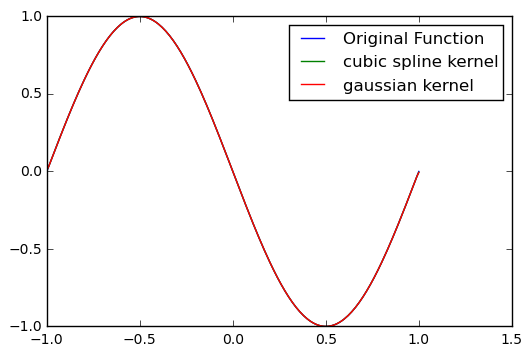

In [11]:
x, f = func_sampling(-1.0, 1.0, 0.01, noise=0)
sine_spline = SPH_approx(-1.0, 1.0, 0.01, spline_kernel, 0.01, noise=0)
sine_gaussian = SPH_approx(-1.0, 1.0, 0.01, gaussian_kernel, 0.01, noise=0)
plt.plot(x, f, label='Original Function')
plt.plot(x, sine_spline, label='cubic spline kernel')
plt.plot(x, sine_gaussian, label='gaussian kernel')
plt.legend()

# Derivative approximation using SPH

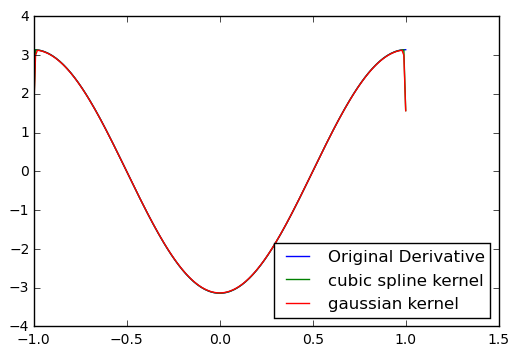

In [12]:
x, f = func_sampling_diff(-1.0, 1.0, 0.01, noise=0)
sine_spline = SPH_approx(-1.0, 1.0, 0.01, spline_diff, 0.01, noise=0)
sine_gaussian = SPH_approx(-1.0, 1.0, 0.01, gaussian_diff, 0.01, noise=0)
plt.plot(x, f, label='Original Derivative')
plt.plot(x, sine_spline, label='cubic spline kernel')
plt.plot(x, sine_gaussian, label='gaussian kernel')
plt.legend(loc='lower right')

## Plot of L2 normalized error vs Number of points

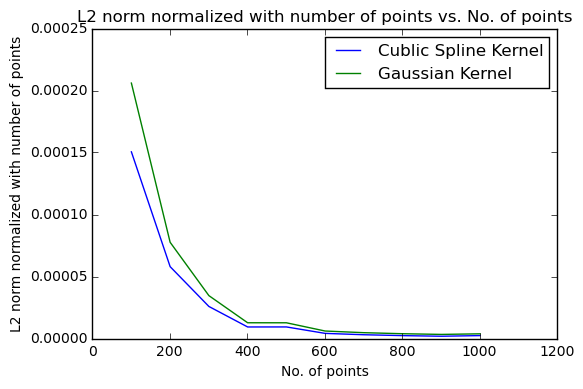

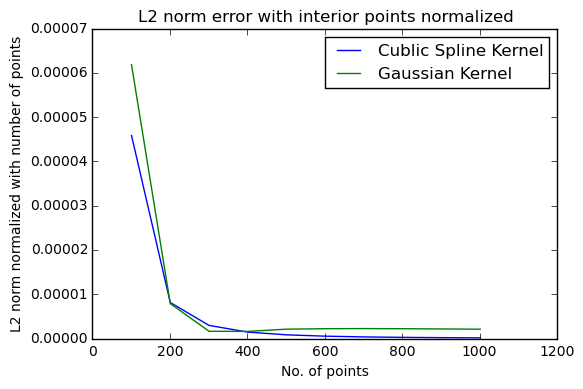

In [13]:
N = [101, 201, 301, 401, 501, 601, 701, 801, 901, 1001]
Err_cubic = np.zeros(len(N))
Err_gaussian = np.zeros(len(N))
Err_cubic_int = np.zeros(len(N))
Err_gaussian_int = np.zeros(len(N))
for i, n in enumerate(N):
    dx = 2.0/n
    x, f = func_sampling(-1.0, 1.0, dx)
    # Taking hdx to be 1.0 for the case of changing number of points.
    SPH_approx_cubic = SPH_approx(-1.0, 1.0, dx, spline_kernel, dx)
    SPH_approx_gaussian = SPH_approx(-1.0, 1.0, dx, gaussian_kernel, dx)
    Err_cubic[i] = L2norm(SPH_approx_cubic - f)
    Err_gaussian[i] = L2norm(SPH_approx_gaussian - f)
    Err_cubic_int[i] = L2norm(SPH_approx_cubic - f, interior=1)
    Err_gaussian_int[i] = L2norm(SPH_approx_gaussian - f, interior=1)
plt.figure(1)
plt.plot(N, Err_cubic, label='Cublic Spline Kernel')
plt.plot(N, Err_gaussian, label='Gaussian Kernel')
plt.title('L2 norm normalized with number of points vs. No. of points')
plt.xlabel('No. of points')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()
plt.figure(2)
plt.plot(N, Err_cubic_int, label='Cublic Spline Kernel')
plt.plot(N, Err_gaussian_int, label='Gaussian Kernel')
plt.title('L2 norm error with interior points normalized')
plt.xlabel('No. of points')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()

## Plot of L2 Normalized Plot vs Number of Points for the differential function

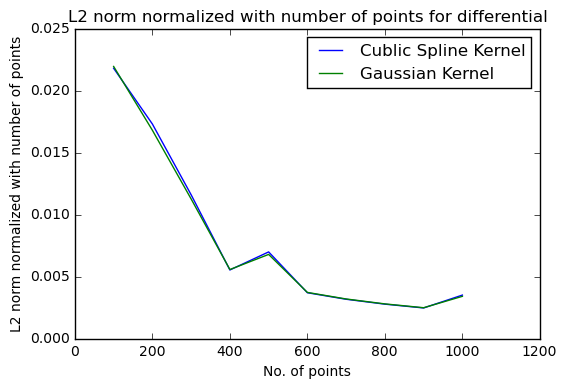

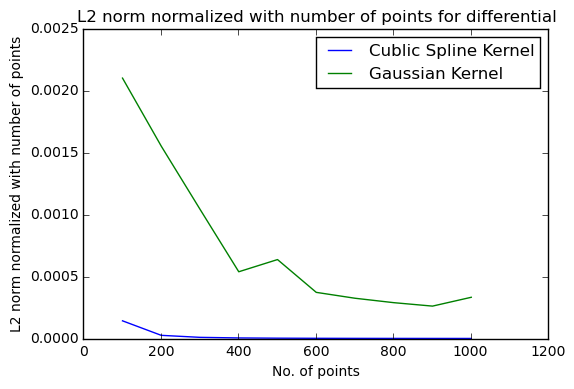

In [14]:
Err_cubic_diff = np.zeros(len(N))
Err_gaussian_diff = np.zeros(len(N))
Err_cubic_diff_int = np.zeros(len(N))
Err_gaussian_diff_int = np.zeros(len(N))
for i, n in enumerate(N):
    dx = 2.0/n
    x, f = func_sampling_diff(-1.0, 1.0, dx)
    # Taking hdx to be 1.0 for the case of changing number of points.
    SPH_approx_cubic = SPH_approx(-1.0, 1.0, dx, spline_diff, dx)
    SPH_approx_gaussian = SPH_approx(-1.0, 1.0, dx, gaussian_diff, dx)
    Err_cubic_diff[i] = L2norm(SPH_approx_cubic - f)
    Err_gaussian_diff[i] = L2norm(SPH_approx_gaussian - f)
    Err_cubic_diff_int[i] = L2norm(SPH_approx_cubic - f, interior=1)
    Err_gaussian_diff_int[i] = L2norm(SPH_approx_gaussian - f, interior=1)
plt.figure(1)
plt.plot(N, Err_cubic_diff, label='Cublic Spline Kernel')
plt.plot(N, Err_gaussian_diff, label='Gaussian Kernel')
plt.title('L2 norm normalized with number of points for differential')
plt.xlabel('No. of points')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()
plt.figure(2)
plt.plot(N, Err_cubic_diff_int, label='Cublic Spline Kernel')
plt.plot(N, Err_gaussian_diff_int, label='Gaussian Kernel')
plt.title('L2 norm normalized with number of points for differential')
plt.xlabel('No. of points')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()

## Plot of L2 Normalized Plot vs hdx

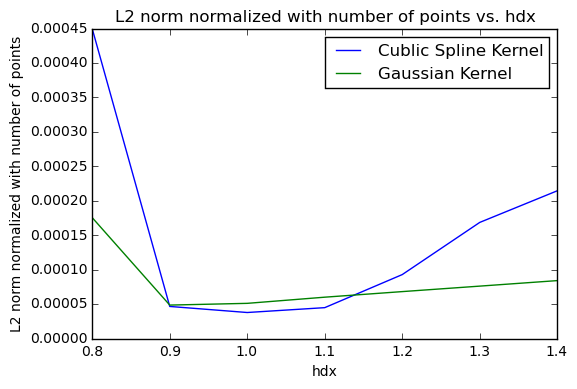

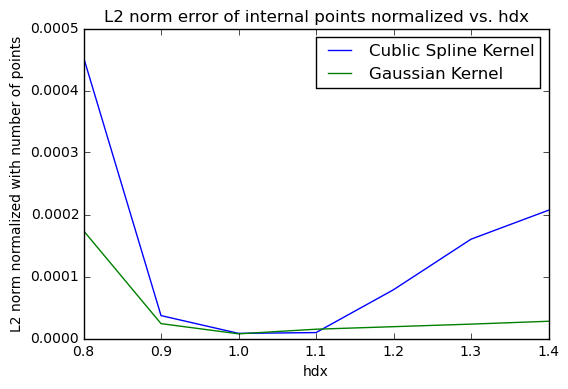

In [15]:
HDX = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
Err_cubic = np.zeros(len(HDX))
Err_gaussian = np.zeros(len(HDX))
Err_cubic_int = np.zeros(len(HDX))
Err_gaussian_int = np.zeros(len(HDX))
for i, hdx in enumerate(HDX):
    dx = 0.01
    x, f = func_sampling(-1.0, 1.0, dx)
    SPH_approx_cubic = SPH_approx(-1.0, 1.0, dx, spline_kernel, hdx*dx)
    SPH_approx_gaussian = SPH_approx(-1.0, 1.0, dx, gaussian_kernel,
                                     hdx*dx)
    Err_cubic[i] = L2norm(SPH_approx_cubic - f)
    Err_gaussian[i] = L2norm(SPH_approx_gaussian - f)
    Err_cubic_int[i] = L2norm(SPH_approx_cubic - f, interior=1)
    Err_gaussian_int[i] = L2norm(SPH_approx_gaussian - f, interior=1)
plt.figure(1)
plt.plot(HDX, Err_cubic, label='Cublic Spline Kernel')
plt.plot(HDX, Err_gaussian, label='Gaussian Kernel')
plt.title('L2 norm normalized with number of points vs. hdx')
plt.xlabel('hdx')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()
plt.figure(2)
plt.plot(HDX, Err_cubic_int, label='Cublic Spline Kernel')
plt.plot(HDX, Err_gaussian_int, label='Gaussian Kernel')
plt.title('L2 norm error of internal points normalized vs. hdx')
plt.xlabel('hdx')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()

## Plot of L2 normalized error vs hdx for the differential function

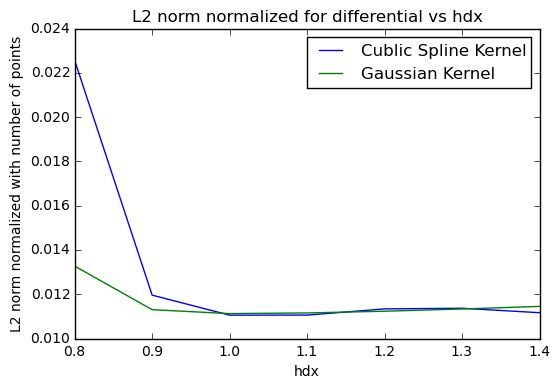

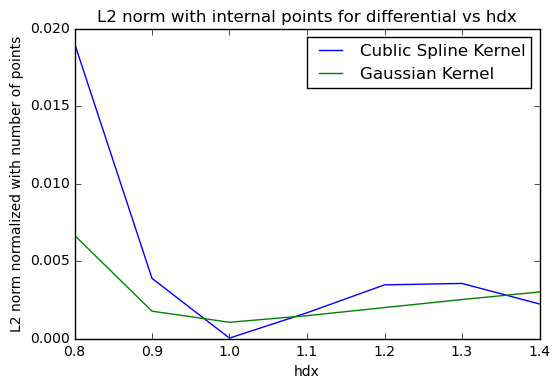

In [16]:
Err_cubic_diff = np.zeros(len(HDX))
Err_gaussian_diff = np.zeros(len(HDX))
Err_cubic_diff_int = np.zeros(len(HDX))
Err_gaussian_diff_int = np.zeros(len(HDX))
for i, hdx in enumerate(HDX):
    dx = 0.01
    x, f = func_sampling_diff(-1.0, 1.0, dx)
    SPH_approx_cubic = SPH_approx(-1.0, 1.0, dx, spline_diff, hdx*dx)
    SPH_approx_gaussian = SPH_approx(-1.0, 1.0, dx, gaussian_diff, hdx*dx)
    Err_cubic_diff[i] = L2norm(SPH_approx_cubic - f)
    Err_gaussian_diff[i] = L2norm(SPH_approx_gaussian - f)
    Err_cubic_diff_int[i] = L2norm(SPH_approx_cubic - f, interior=1)
    Err_gaussian_diff_int[i] = L2norm(SPH_approx_gaussian - f, interior=1)
plt.figure(1)
plt.plot(HDX, Err_cubic_diff, label='Cublic Spline Kernel')
plt.plot(HDX, Err_gaussian_diff, label='Gaussian Kernel')
plt.title('L2 norm normalized for differential vs hdx')
plt.xlabel('hdx')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()
plt.figure(2)
plt.plot(HDX, Err_cubic_diff_int, label='Cublic Spline Kernel')
plt.plot(HDX, Err_gaussian_diff_int, label='Gaussian Kernel')
plt.title('L2 norm with internal points for differential vs hdx')
plt.xlabel('hdx')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()

## L2 norm normalized with number of points with noise

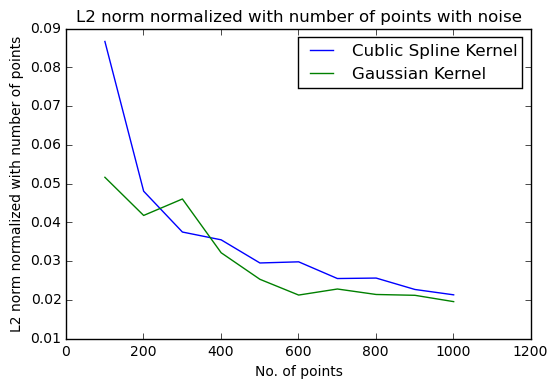

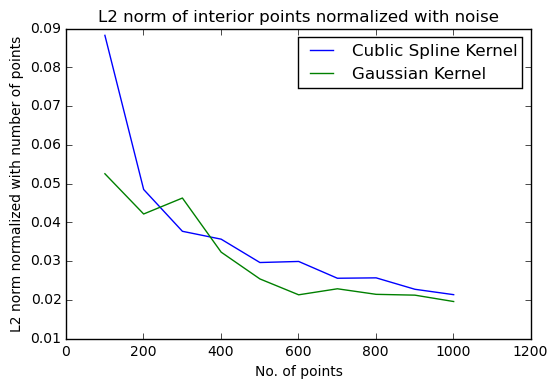

In [17]:
N = [101, 201, 301, 401, 501, 601, 701, 801, 901, 1001]
Err_cubic = np.zeros(len(N))
Err_gaussian = np.zeros(len(N))
Err_cubic_int = np.zeros(len(N))
Err_gaussian_int = np.zeros(len(N))
for i, n in enumerate(N):
    dx = 2.0/n
    x, f = func_sampling(-1.0, 1.0, dx, noise=1)
    # Taking hdx to be 1.0 for the case of changing number of points.
    SPH_approx_cubic = SPH_approx(-1.0, 1.0, dx, spline_kernel, dx,
                                  noise=1)
    SPH_approx_gaussian = SPH_approx(-1.0, 1.0, dx, gaussian_kernel, dx,
                                     noise=1)
    Err_cubic[i] = L2norm(SPH_approx_cubic - f)
    Err_gaussian[i] = L2norm(SPH_approx_gaussian - f)
    Err_cubic_int[i] = L2norm(SPH_approx_cubic - f, interior=1)
    Err_gaussian_int[i] = L2norm(SPH_approx_gaussian - f, interior=1)
plt.figure(1)
plt.plot(N, Err_cubic, label='Cublic Spline Kernel')
plt.plot(N, Err_gaussian, label='Gaussian Kernel')
plt.title('L2 norm normalized with number of points with noise')
plt.xlabel('No. of points')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()
plt.figure(2)
plt.plot(N, Err_cubic_int, label='Cublic Spline Kernel')
plt.plot(N, Err_gaussian_int, label='Gaussian Kernel')
plt.title('L2 norm of interior points normalized with noise')
plt.xlabel('No. of points')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()

## L2 norm normalized with number of points for differential with noise

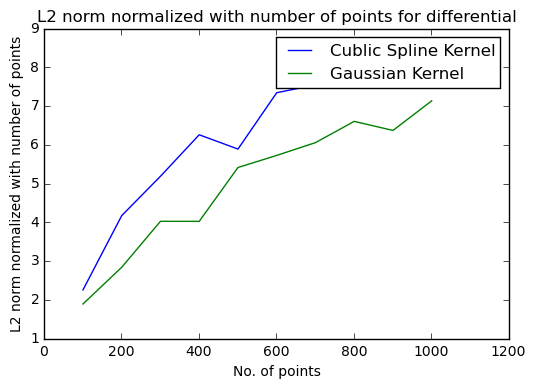

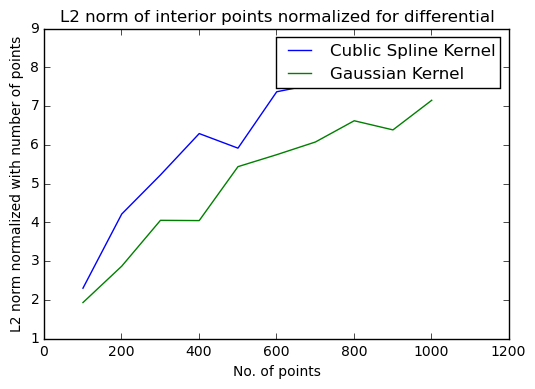

In [18]:
Err_cubic_diff = np.zeros(len(N))
Err_gaussian_diff = np.zeros(len(N))
Err_cubic_diff_int = np.zeros(len(N))
Err_gaussian_diff_int = np.zeros(len(N))
for i, n in enumerate(N):
    dx = 2.0/n
    x, f = func_sampling_diff(-1.0, 1.0, dx, noise=1)
    # Taking hdx to be 1.0 for the case of changing number of points.
    SPH_approx_cubic = SPH_approx(-1.0, 1.0, dx, spline_diff, dx, noise=1)
    SPH_approx_gaussian = SPH_approx(-1.0, 1.0, dx, gaussian_diff, dx,
                                     noise=1)
    Err_cubic_diff[i] = L2norm(SPH_approx_cubic - f)
    Err_gaussian_diff[i] = L2norm(SPH_approx_gaussian - f)
    Err_cubic_diff_int[i] = L2norm(SPH_approx_cubic - f, interior=1)
    Err_gaussian_diff_int[i] = L2norm(SPH_approx_gaussian - f, interior=1)
plt.figure(1)
plt.plot(N, Err_cubic_diff, label='Cublic Spline Kernel')
plt.plot(N, Err_gaussian_diff, label='Gaussian Kernel')
plt.title('L2 norm normalized with number of points for differential')
plt.xlabel('No. of points')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()
plt.figure(2)
plt.plot(N, Err_cubic_diff_int, label='Cublic Spline Kernel')
plt.plot(N, Err_gaussian_diff_int, label='Gaussian Kernel')
plt.title('L2 norm of interior points normalized for differential')
plt.xlabel('No. of points')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()

## L2 norm normalized with number of points vs. hdx with noise

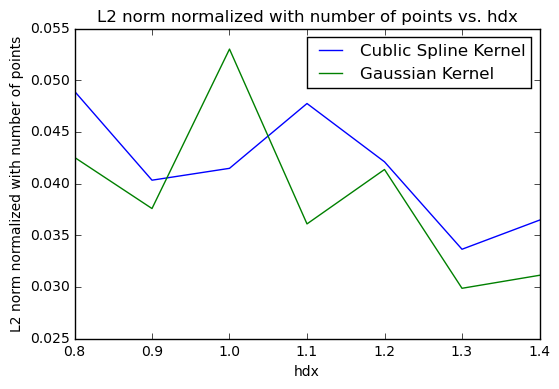

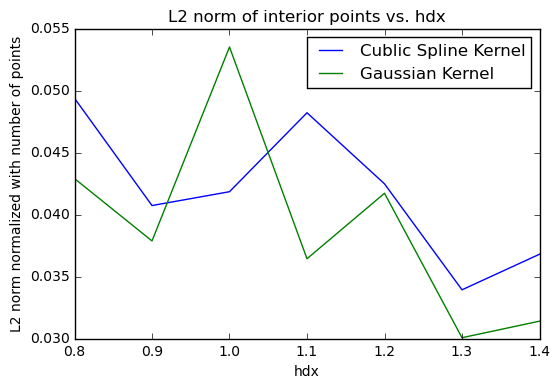

In [19]:
HDX = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
Err_cubic = np.zeros(len(HDX))
Err_gaussian = np.zeros(len(HDX))
Err_cubic_int = np.zeros(len(HDX))
Err_gaussian_int = np.zeros(len(HDX))
for i, hdx in enumerate(HDX):
    dx = 0.01
    x, f = func_sampling(-1.0, 1.0, dx, noise=1)
    SPH_approx_cubic = SPH_approx(-1.0, 1.0, dx, spline_kernel, hdx*dx,
                                  noise=1)
    SPH_approx_gaussian = SPH_approx(-1.0, 1.0, dx, gaussian_kernel,
                                     hdx*dx, noise=1)
    Err_cubic[i] = L2norm(SPH_approx_cubic - f)
    Err_gaussian[i] = L2norm(SPH_approx_gaussian - f)
    Err_cubic_int[i] = L2norm(SPH_approx_cubic - f, interior=1)
    Err_gaussian_int[i] = L2norm(SPH_approx_gaussian - f, interior=1)
plt.figure(1)
plt.plot(HDX, Err_cubic, label='Cublic Spline Kernel')
plt.plot(HDX, Err_gaussian, label='Gaussian Kernel')
plt.title('L2 norm normalized with number of points vs. hdx')
plt.xlabel('hdx')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()
plt.figure(2)
plt.plot(HDX, Err_cubic_int, label='Cublic Spline Kernel')
plt.plot(HDX, Err_gaussian_int, label='Gaussian Kernel')
plt.title('L2 norm of interior points vs. hdx')
plt.xlabel('hdx')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()

## L2 norm normalized for differential vs hdx with noise

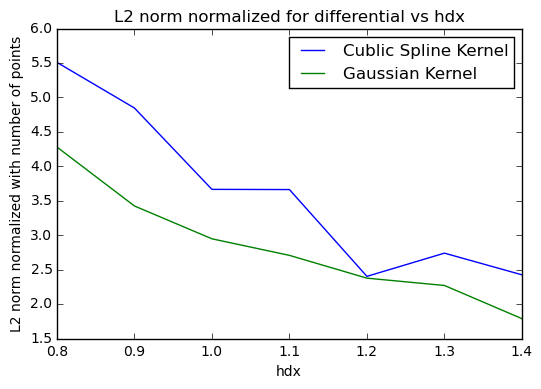

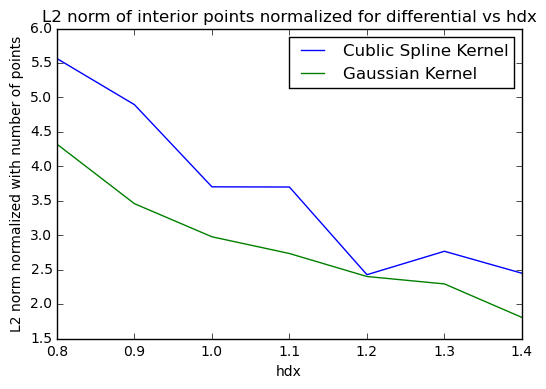

In [20]:
Err_cubic_diff = np.zeros(len(HDX))
Err_gaussian_diff = np.zeros(len(HDX))
Err_cubic_diff_int = np.zeros(len(HDX))
Err_gaussian_diff_int = np.zeros(len(HDX))
for i, hdx in enumerate(HDX):
    dx = 0.01
    x, f = func_sampling_diff(-1.0, 1.0, dx, noise=1)
    SPH_approx_cubic = SPH_approx(-1.0, 1.0, dx, spline_diff, hdx*dx,
                                  noise=1)
    SPH_approx_gaussian = SPH_approx(-1.0, 1.0, dx, gaussian_diff, hdx*dx,
                                     noise=1)
    Err_cubic_diff[i] = L2norm(SPH_approx_cubic - f)
    Err_gaussian_diff[i] = L2norm(SPH_approx_gaussian - f)
    Err_cubic_diff_int[i] = L2norm(SPH_approx_cubic - f, interior=1)
    Err_gaussian_diff_int[i] = L2norm(SPH_approx_gaussian - f, interior=1)
plt.figure(1)
plt.plot(HDX, Err_cubic_diff, label='Cublic Spline Kernel')
plt.plot(HDX, Err_gaussian_diff, label='Gaussian Kernel')
plt.title('L2 norm normalized for differential vs hdx')
plt.xlabel('hdx')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()
plt.figure(2)
plt.plot(HDX, Err_cubic_diff_int, label='Cublic Spline Kernel')
plt.plot(HDX, Err_gaussian_diff_int, label='Gaussian Kernel')
plt.title('L2 norm of interior points normalized for differential vs hdx')
plt.xlabel('hdx')
plt.ylabel('L2 norm normalized with number of points')
plt.legend()

# Conclusions: